In [1]:
import matplotlib.pyplot as plt
from tifffile import imread
from skimage.transform import rescale
from PIL import Image
import os

In [2]:
###PLACE TO CHANGE##########
# Required
image_path = "/data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Input/GSM8509590/GSM8509590_20240522_Xen0024909_IPFTMA5.tif"

# Optional
output_path = "/data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Output/Visium_HD/GSM8509590/01.Subset/GSM8509590/Microscope/grid_overlay.png"
resize_factor = 0.1  # 1.0 = no resize, <1 = downscale


Image loaded. Shape: (2492, 3960, 1)


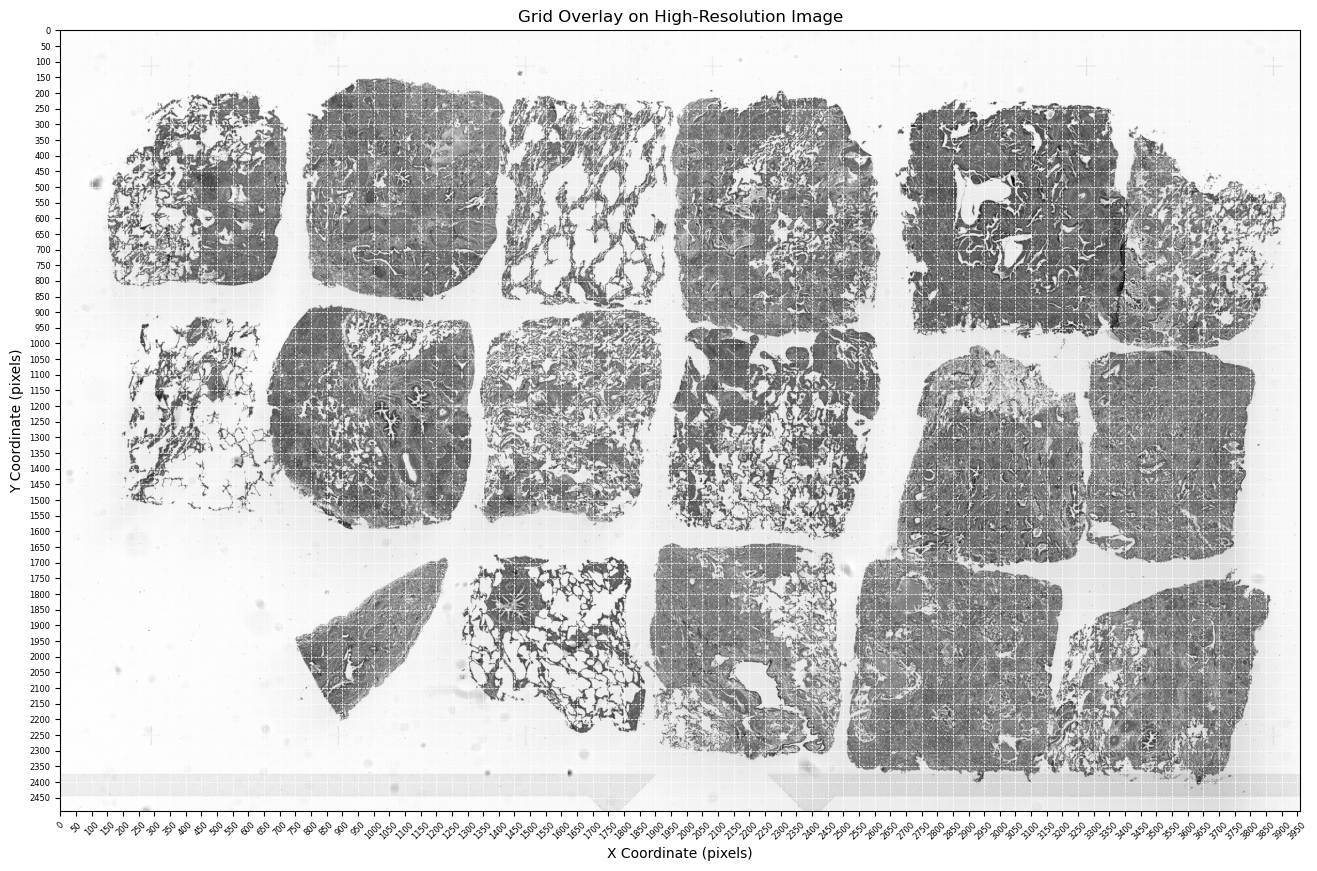

In [3]:
img = imread(image_path)

# Resize if needed
if resize_factor != 1.0:
    img = rescale(img, resize_factor, preserve_range=True, anti_aliasing=True).astype(img.dtype)

print(f"Image loaded. Shape: {img.shape}")

plt.figure(figsize=(16, 16))
plt.imshow(img, cmap='gray')

# Grid interval
interval = int(500 * resize_factor)
plt.xticks(ticks=range(0, img.shape[1], interval), fontsize=6, rotation=45)
plt.yticks(ticks=range(0, img.shape[0], interval), fontsize=6)
plt.tick_params(axis='x', labelrotation=45)
plt.grid(color='white', linestyle='--', linewidth=0.5)

plt.xlabel("X Coordinate (pixels)", fontsize=10)
plt.ylabel("Y Coordinate (pixels)", fontsize=10)
plt.title("Grid Overlay on High-Resolution Image")

plt.show()

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.imshow(img, cmap='gray')

# Define grid interval (adjust as needed)
interval = int(500 * resize_factor)

# Configure ticks and grid
plt.xticks(ticks=range(0, img.shape[1], interval), fontsize=6, rotation=45)
plt.yticks(ticks=range(0, img.shape[0], interval), fontsize=6)
plt.grid(color='white', linestyle='--', linewidth=0.5)

plt.xlabel("X Coordinate (pixels)", fontsize=10)
plt.ylabel("Y Coordinate (pixels)", fontsize=10)

# Save the figure without displaying it
plt.savefig(output_path, bbox_inches='tight', dpi=150)
plt.close()  # prevent plot display in Jupyter
print(f"Grid overlay saved to: {os.path.abspath(output_path)}")


Grid overlay saved to: /data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Output/Visium_HD/GSM8509590/01.Subset/GSM8509590/Microscope/grid_overlay.png


In [5]:
###PLACE TO CHANGE##########
# Required inputs
crop_box = (18700, 16300, 25000, 23500)    # Format: (left, upper, right, lower), (x_min, y_min, x_max, y_max)
output_path = "/data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Output/Visium_HD/GSM8509590/01.Subset/GSM8509590/Microscope/Tissue2.tif"

# Optional
resize_factor = 0.1  # Set to <1.0 to downscale

Original image size: (39600, 24915)
Cropped image size: (6300, 7200)


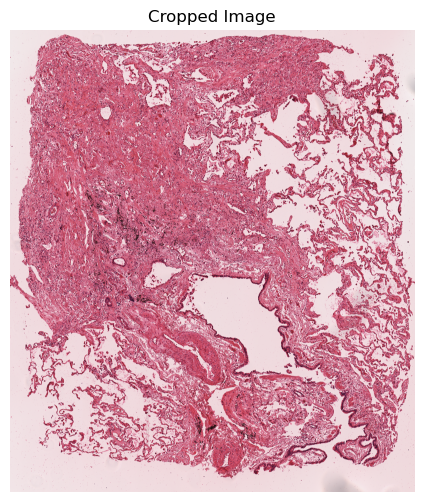

Resized image size: (630, 720)


In [6]:
# Enable large image support
Image.MAX_IMAGE_PIXELS = None

# Load image
img = Image.open(image_path)
print(f"Original image size: {img.size}")

# Crop image
cropped_img = img.crop(crop_box)
print(f"Cropped image size: {cropped_img.size}")

# Show cropped image inline
plt.figure(figsize=(6, 6))
plt.imshow(cropped_img, cmap='gray')
plt.title("Cropped Image")
plt.axis('off')
plt.show()

# Resize (optional)
if resize_factor != 1.0:
    new_size = (
        int(cropped_img.width * resize_factor),
        int(cropped_img.height * resize_factor)
    )
    cropped_img = cropped_img.resize(new_size, resample=Image.LANCZOS)
    print(f"Resized image size: {cropped_img.size}")    

In [7]:
cropped_img.save(output_path, format="TIFF")
print(f"Saved to: {os.path.abspath(output_path)}")

Saved to: /data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Output/Visium_HD/GSM8509590/01.Subset/GSM8509590/Microscope/Tissue2.tif
